## Explainer notebook on how to load the data

In [1]:
%load_ext autoreload
# %load_ext line_profiler
%autoreload 2

In [1]:
import decoding_analysis_vis as dav  # package with custom functions of this repo 
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns
sns.set_palette('colorblind')

### Load a single session
- Give `sess_type` (`proj` or `sens`) and `session_id` (0 to 5 for both types)
- Some other arguments for normalisation, shuffling etc. 

In [2]:
Sess = dav.SimpleSession(verbose=1, session_id=0, sess_type='proj',
                        shuffle_trial_labels=False,
                        shuffle_timepoints=False,
                        shuffle_all_data=False,
                        prestim_baseline=False,
                        bool_filter_neurons=True)                   

session name : 2021-02-24_RL132.pkl
Excluded 757 out of 2156 neurons


The main data set is contained in `SimpleSession.full_ds`. It is stored in `xarray.Dataset` format, with various coordinates and variables attached. Example printed below:

In [4]:
Sess.full_ds

<xarray.Dataset>
Dimensions:                 (neuron: 1415, time: 182, trial: 300)
Coordinates:
  * neuron                  (neuron) int64 0 1 2 3 4 ... 1411 1412 1413 1414
  * time                    (time) float64 -2.063 -1.997 -1.93 ... 9.984 10.05
  * trial                   (trial) int64 0 1 2 3 4 5 ... 295 296 297 298 299
Data variables:
    activity                (neuron, time, trial) float32 1.768 ... -0.4341
    cell_s1                 (neuron) bool False True True ... True True False
    cell_id                 (neuron) int64 0 1 3 4 7 ... 4452 4456 4461 4465
    trial_type              (trial) <U14 'projecting' 'projecting' ... 'sham'
    frame_array             (time) int64 0 1 2 3 4 5 ... 176 177 178 179 180 181
    artefact_bool           (time) bool False False False ... False False False
    targets_projecting      (neuron) bool False False False ... False False
    targets_non_projecting  (neuron) bool False False False ... False False

Use `xarray` functionality to index parts of the data set by name, using e.g. `sel()`:

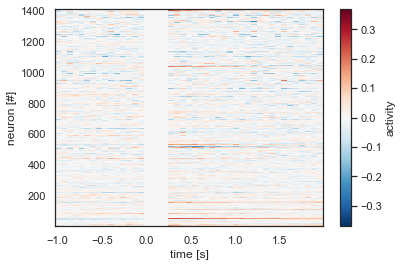

In [5]:
Sess.full_ds.sel(time=slice(-1, 2)).sel(neuron=Sess.full_ds.cell_s1).activity.mean('trial').plot()

### Selecting data:
To select data (e.g., a certain cell/trial combination), use the `SimpleSession.dataset_selector()` function for ease and speed:

In [6]:
tmpr = Sess.dataset_selector(region='s1', frame_id=78, trial_type_list=['projecting', 'sham'], 
                            deepcopy=True) 

In [7]:
tmpr

<xarray.Dataset>
Dimensions:                 (neuron: 881, time: 1, trial: 200)
Coordinates:
  * neuron                  (neuron) int64 1 2 6 7 11 ... 1410 1411 1412 1413
  * time                    (time) float64 3.157
  * trial                   (trial) int64 0 1 2 3 4 5 ... 295 296 297 298 299
Data variables:
    activity                (neuron, time, trial) float32 -0.2569 ... 0.2759
    cell_s1                 (neuron) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    cell_id                 (neuron) float64 1.0 3.0 9.0 ... 4.456e+03 4.461e+03
    trial_type              (trial) <U14 'projecting' 'projecting' ... 'sham'
    frame_array             (time) int64 78
    artefact_bool           (time) bool False
    targets_projecting      (neuron) float64 0.0 0.0 0.0 1.0 ... 0.0 0.0 0.0 0.0
    targets_non_projecting  (neuron) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

### Loading all sessions:
The class `AllSessions` loads all sessions of a particular session type (`sens` or `proj`). 

In [ ]:
AllSesDict = {xx: dav.AllSessions(memory_efficient=True, sess_type=xx) for xx in ['sens', 'proj']}